<a href="https://colab.research.google.com/github/WallevaN/TiteProju/blob/main/TITE_Proju.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Muokkaa tämä koodista:
```
/content/sample_data/image_0008_w.jpg
```
Tilalle haluamasti kuvan url, kuvia löydät vasemmasta palkista

**Materiaali tunnistus käyttäen googlen valmista mallia, tunnistaa objektin datasetin kuvista ihan ok 11.12.2024**

In [ ]:
import tensorflow_hub as hub
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

# Load the CSV file into a pandas DataFrame
class_descriptions = pd.read_csv('/content/oidv7-class-descriptions.csv')

# Load the model
model_url = "https://tfhub.dev/google/openimages_v4/ssd/mobilenet_v2/1"
detector = hub.load(model_url)

In [ ]:
# Load and preprocess the image
img = mpimg.imread('/content/sample_data/muovi1.jpg')
img_tensor = tf.convert_to_tensor(img, dtype=tf.float32)
input_tensor = tf.image.resize(img_tensor, (512, 512))
input_tensor = input_tensor / 255.0
input_tensor = tf.expand_dims(input_tensor, axis=0)

In [ ]:
detector_output = detector.signatures['default'](input_tensor)

In [ ]:
class_names = detector_output["detection_class_names"].numpy().astype(str)
detection_scores = detector_output["detection_scores"].numpy()
detection_boxes = detector_output["detection_boxes"].numpy()

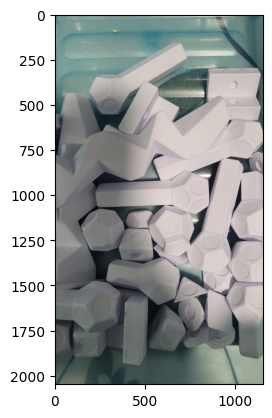

╒═══════════════════╤════════════════════╤═════════════════════╤════════════════════╕
│      Object       │  Confidence (0.1)  │  Confidence (0.15)  │  Confidence (0.2)  │
╞═══════════════════╪════════════════════╪═════════════════════╪════════════════════╡
│        Toy        │        0.33        │        0.33         │        0.33        │
├───────────────────┼────────────────────┼─────────────────────┼────────────────────┤
│       Chair       │        0.11        │                     │                    │
├───────────────────┼────────────────────┼─────────────────────┼────────────────────┤
│     Footwear      │        0.11        │                     │                    │
├───────────────────┼────────────────────┼─────────────────────┼────────────────────┤
│     Footwear      │        0.1         │                     │                    │
├───────────────────┼────────────────────┼─────────────────────┼────────────────────┤
│       Chair       │        0.1         │            

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate

plt.imshow(img)
plt.show()

# Define thresholds
thresholds = [0.075, 0.15, 0.2]

# Store results for each threshold
results = {threshold: [] for threshold in thresholds}

# Iterate through thresholds and store results
for threshold in thresholds:
  # Filter detections based on threshold
  filtered_indices = np.where(detection_scores > threshold)[0]
  filtered_labels = [class_names[j] for j in filtered_indices]
  filtered_scores = [detection_scores[j] for j in filtered_indices]

  # Store labels and scores for the current threshold
  for label_mid, score in zip(filtered_labels, filtered_scores):
    label_row = class_descriptions[class_descriptions['LabelName'] == label_mid]
    if not label_row.empty:
      label_name = label_row['DisplayName'].values[0]
      results[threshold].append([label_name, f"{score:.2f}"])

# Create table headers
headers = ["Object", "Confidence (0.1)", "Confidence (0.15)", "Confidence (0.2)"]

# Create table, limit to 15 rows
max_rows = 15
table_data = []

max_list_length = max(len(results[threshold]) for threshold in thresholds)
num_rows = min(max_rows, max_list_length) #find the longest list, compare to the desired number of rows

for i in range(num_rows):
    row = []
    for threshold in thresholds:
        if i < len(results[threshold]):
            row.extend(results[threshold][i])  # Add object and confidence for this threshold
        else:
            row.extend(["" , ""])  # Add empty cells if no more objects for this threshold
    table_data.append(row[0:1] + row[1::2]) #reformat to be side by side

# Print the table
print(tabulate(table_data, headers=headers, tablefmt="fancy_grid", numalign="center", stralign="center"))

In [ ]:
material_mapping = {
    "Person": "Plastic",
    "Car": "Metal",
    "Building": "Metal",
    "Tree": "Wood",
    "Table": "Wood",
    "Chair": "Wood",
    "Bottle": "Plastic",
    "Window": "Glass",
    "Phone": "Plastic",
    "Laptop": "Metal",
    "Cup": "Plastic",
    "Spoon": "Metal",
    "Door": "Wood",
    "Mirror": "Glass",
    "Ball": "Plastic",
    "Fence": "Wood",
    "Bicycle": "Metal",
    "Clock": "Plastic",
    "Shelf": "Wood",
    "Cabinet": "Wood",
    "TV": "Plastic",
    "Coffee cup": "Glass",
    "Mug": "Glass",
    "Wheel": "Metal",
    "Plant": "Wood",
    "Footwear": "Plastic",
    "Furniture": "Wood",
    "Book": "Plastic",
    "Bed": "Wood",
    "Desk": "Wood",
    "Sofa": "Wood",
    "Toilet": "Glass",
    "Box": "Plastic",
    "Toy": "Plastic",
    "Computer keyboard": "Plastic"
}

In [ ]:
# Create a new list to store the results with materials
table_data_with_material = []

for row in table_data:
    object_name = row[0]
    material = material_mapping.get(object_name, "Unknown") # Default to Unknown if no mapping exists
    new_row = row + [material]
    table_data_with_material.append(new_row)


# Update headers
headers.append("Material")

# Print the table with Material column
print(tabulate(table_data_with_material, headers=headers, tablefmt="fancy_grid", numalign="center", stralign="center"))

╒═══════════════════╤════════════════════╤═════════════════════╤════════════════════╤════════════╕
│      Object       │  Confidence (0.1)  │  Confidence (0.15)  │  Confidence (0.2)  │  Material  │
╞═══════════════════╪════════════════════╪═════════════════════╪════════════════════╪════════════╡
│        Toy        │        0.33        │        0.33         │        0.33        │  Plastic   │
├───────────────────┼────────────────────┼─────────────────────┼────────────────────┼────────────┤
│       Chair       │        0.11        │                     │                    │    Wood    │
├───────────────────┼────────────────────┼─────────────────────┼────────────────────┼────────────┤
│     Footwear      │        0.11        │                     │                    │  Plastic   │
├───────────────────┼────────────────────┼─────────────────────┼────────────────────┼────────────┤
│     Footwear      │        0.1         │                     │                    │  Plastic   │
├─────────

In [ ]:
# Initialize variables to store the most likely material and the highest confidence score
most_likely_material = None
highest_confidence = 0

# Iterate through the rows of data containing object names, confidence scores, and materials
for row in table_data_with_material:
    object_name, confidence_01, confidence_015, confidence_02, material = row

    # Determine the highest confidence score available for the current row
    confidence = max(float(confidence_01) if confidence_01 else 0,  # Use confidence_01 if available
                      float(confidence_015) if confidence_015 else 0,  # Use confidence_015 if available
                      float(confidence_02) if confidence_02 else 0)  # Use confidence_02 if available

    # Update the most likely material if this row has the highest confidence so far
    if confidence > highest_confidence:
        highest_confidence = confidence
        most_likely_material = material

# Output the most likely material based on the highest confidence score
print(f"The most likely material is: {most_likely_material}")

The most likely material is: Plastic
